In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
df = pd.read_csv(r'C:\Users\Vishnu\Downloads\LendingCaseStudy\loan.csv')
df.head()

C:\Users\Vishnu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

# Removing Null Values

In [4]:
row_null = df.isnull().all(axis = 1).sum() #checking null values in the rows
row_null

0

In [5]:
col_null = df.isnull().all(axis = 0).sum() #checking null values in the columns
col_null

54

In [6]:
df = df[df.columns[(df.isnull().sum())/len(df) < 0.3]] #removing all the columns which have only Null values > 2/3rd of No of rows

In [7]:
df.shape

(39717, 53)

In [8]:
df.columns[(df == 0).all() | (df == 'NA').all()]

Index(['acc_now_delinq', 'delinq_amnt'], dtype='object')

In [9]:
df = df.drop(df.columns[(df == 0).all() | (df == 'NA').all()], axis = 1) # Removing the columns which has only 0 or NA values

In [10]:
df.shape

(39717, 51)

# Data Conversion

In [11]:
df['emp_length'] = df['emp_length'].str.strip('<years') #Removing the extra symbols and characters from the column emp_length
df['emp_length'] = df['emp_length'].str.replace('+','')

<ipython-input-11-3081dd18d017>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['emp_length'] = df['emp_length'].str.replace('+','')


In [12]:
df['emp_length'].str.replace('','0')

0        01000 0
1        0 010 0
2        01000 0
3        01000 0
4          010 0
          ...   
39712      040 0
39713      030 0
39714    0 010 0
39715    0 010 0
39716    0 010 0
Name: emp_length, Length: 39717, dtype: object

In [13]:
df['emp_length'].isnull().sum() #Checking for null values in the column emp_length

1075

In [14]:
df['emp_length'].fillna('0', inplace = True) #Filling the null values with 0

In [15]:
df['emp_length'] = df['emp_length'].astype(int) #Converting the data type of the column emp_length from object to int

In [16]:
df['verification_status'].astype(str) # Converting the datatype of verification_status from object to string

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
              ...       
39712       Not Verified
39713       Not Verified
39714       Not Verified
39715       Not Verified
39716       Not Verified
Name: verification_status, Length: 39717, dtype: object

In [17]:
df['verification_status'].isnull().sum() # CHecking for blank/null values in the column verification_status

0

# Removing Duplicates

In [18]:
df.loc[df.duplicated(), :] #Checking for duplicates


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens


In [19]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                      int32
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [20]:
#df.to_csv('Casestudy.csv', index=False)

# Removing Unwanted Columns

In [21]:
df.nunique().sort_values() #Checking for unique values in the columns

tax_liens                         1
chargeoff_within_12_mths          1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                        371
earliest_cr_line                526
zip_code                    

In [22]:
df = df.drop(['tax_liens','chargeoff_within_12_mths','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis = 1) 
#Removing the columns which has only 1 value and thus do not contribute to the analysis


In [23]:
df = df.drop(['url','addr_state','zip_code','member_id','emp_title', 'title','earliest_cr_line','inq_last_6mths','open_acc'], axis = 1) #Removing the columns that do not contribute to the analysis

In [24]:
df = df.drop(['collection_recovery_fee','recoveries', 'revol_bal','total_acc','out_prncp','out_prncp_inv','delinq_2yrs'], axis = 1) #Removing the columns related to recoveries as they are required only for charged off applicants

In [25]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length                int32
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
pub_rec                   int64
revol_util               object
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
total_rec_int           float64
total_rec_late_fee      float64
last_pymnt_d             object
last_pymnt_amnt         float64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [26]:
df['int_rate'] = df['int_rate'].str.strip('%').astype(float) # Removing the % symbol in the columns int_rate and revol_util and converting them to float
df['revol_util'] = df['revol_util'].str.strip('%').astype(float)

In [27]:
df['term'] = df['term'].str.strip(' months').astype(int) #Removing the space in front of the cell values and the term months and the converting the column term into int


# Converting Columns with Date into Datetime Datatype

In [28]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y') #Converting the column issue_d datatype to datetime and creating two new columns for issue_d Year and issue_d Month
df['issue_d_year'] = df['issue_d'].dt.year
#df['issue_d_year'] = df['issue_d_year'].astype(object)
df['issue_d_month'] = df['issue_d'].dt.strftime('%b')
#df['issue_d_month'] = df['issue_d_month'].astype(object)
df['issue_d_year'].dtype

dtype('int64')

In [29]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y') #Converting the column last_payment_d datatype to datetime
df['last_pymnt_d'].dtype

dtype('<M8[ns]')

In [30]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y') #Converting the column last_credit_pull_d datatype to datetime
df['last_credit_pull_d'].dtype

dtype('<M8[ns]')

In [31]:
df.head()
    

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,Dec
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,1008.71,456.46,435.17,0.00,2013-04-01,119.66,2013-09-01,0.0,2011,Dec
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,Dec
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,2015-01-01,357.48,2016-04-01,0.0,2011,Dec
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,3513.33,2475.94,1037.39,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,Dec


# Univariate Analysis

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


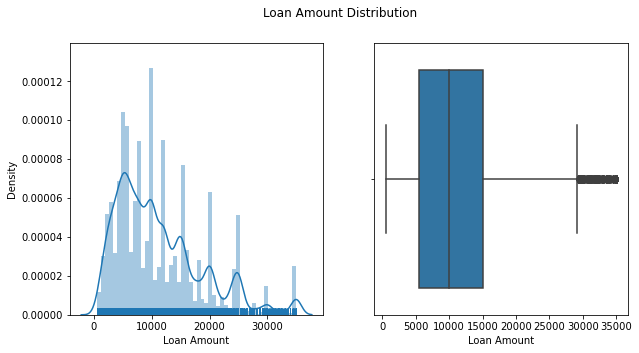

In [32]:
#Distribution of the variable loan_amnt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df.loan_amnt, rug = True)
plt.xlabel('Loan Amount')
plt.subplot(1,2,2)
sns.boxplot(df.loan_amnt)
plt.suptitle('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.show()

In [33]:
df['loan_amnt'].describe() #Most of the applicants have applied for a loan amount of Rs.10000.00

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


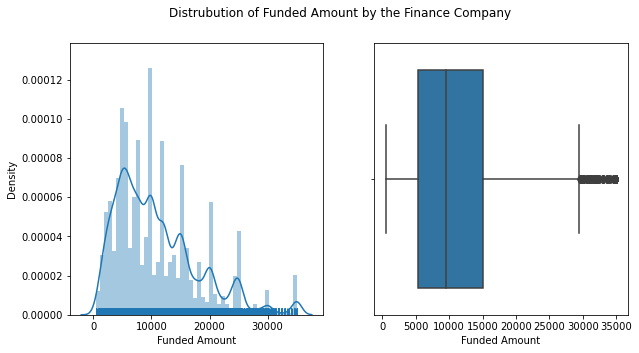

In [34]:
#Distribution of the variable funded_amnt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df.funded_amnt, rug = True)
plt.xlabel('Funded Amount')
plt.subplot(1,2,2)
sns.boxplot(df.funded_amnt)
plt.suptitle('Distrubution of Funded Amount by the Finance Company')
plt.xlabel('Funded Amount')
plt.show()

In [35]:
df['funded_amnt'].describe() #Most of the applicants were sanctioned their requested loan amount

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


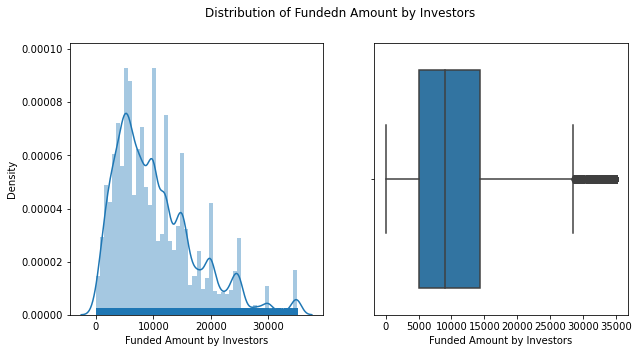

In [36]:
#Distribution of the variable funded_amnt_inv
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df.funded_amnt_inv, rug = True)
plt.xlabel('Funded Amount by Investors')
plt.subplot(1,2,2)
sns.boxplot(df.funded_amnt_inv)
plt.suptitle('Distribution of Fundedn Amount by Investors')
plt.xlabel('Funded Amount by Investors')
plt.show()

In [37]:
df['funded_amnt_inv'].describe() #Similar to funded amount, i.e most of the loans were sanctioned as per the loan amount requested by the applicants

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


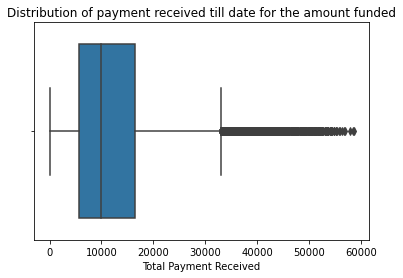

In [38]:
#Distribution of payment received till date for the amount funded
sns.boxplot(df['total_pymnt'])
plt.title('Distribution of payment received till date for the amount funded')
plt.xlabel('Total Payment Received')
plt.show()

In [39]:
df['total_pymnt'].describe() #Almost all the repayments are made promptly

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


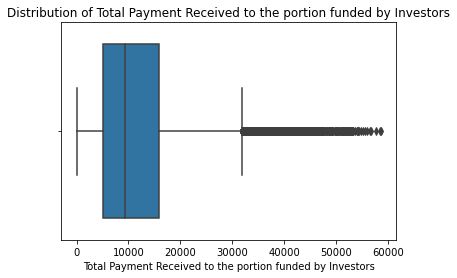

In [40]:
#Distribution of Total Payment Received to the portion funded by Investors
sns.boxplot(df['total_pymnt_inv'])
plt.title('Distribution of Total Payment Received to the portion funded by Investors')
plt.xlabel('Total Payment Received to the portion funded by Investors')
plt.show()

In [41]:
df['total_pymnt_inv'].describe() #Almost all the amount is correctly repaid by the applicants

count    39717.000000
mean     11567.149118
std       8942.672613
min          0.000000
25%       5112.310000
50%       9287.150000
75%      15798.810000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

In [42]:
df['annual_inc'] = df['annual_inc'].astype(float)

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


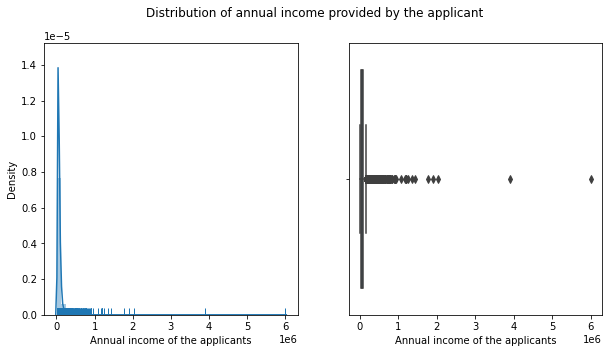

In [43]:
#Distribution of annual income provided by the applicant
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df.annual_inc, rug = True)
plt.xlabel('Annual income of the applicants')
plt.subplot(1,2,2)
sns.boxplot(df.annual_inc)
plt.suptitle('Distribution of annual income provided by the applicant')
plt.xlabel('Annual income of the applicants')
plt.show()

In [44]:
df['annual_inc'].describe() # Loan requirement is more among people with annual income < 2L

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


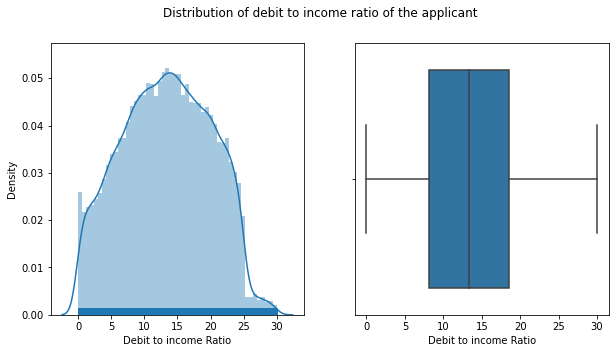

In [45]:
#Distribution of debit to income ratio of the applicant
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df.dti, rug = True)
plt.xlabel('Debit to income Ratio')
plt.subplot(1,2,2)
sns.boxplot(df.dti)
plt.suptitle('Distribution of debit to income ratio of the applicant')
plt.xlabel('Debit to income Ratio')
plt.show()

In [46]:
df['dti'].describe() #Most of the Debts are within the repayment capacity of the applicant i.e within atmost 30% of their income

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [47]:
df['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

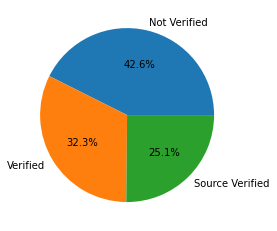

In [48]:
#Distribution of Verification status of income of the applicants
source_labels = ['Not Verified','Verified','Source Verified']
plt.pie(df['verification_status'].value_counts(), labels = source_labels, autopct='%.1f%%')
plt.show()

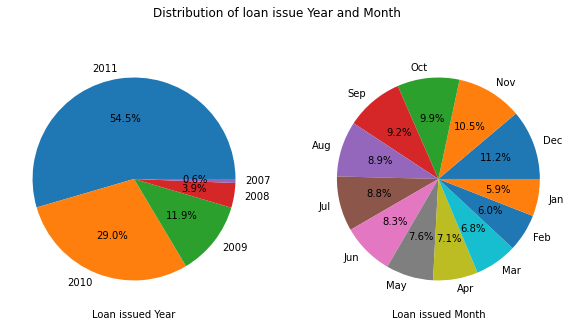

In [49]:
#Distribution of Loan Issue Year and Month
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
year_labels = pd.unique(df['issue_d_year'])
plt.pie(df['issue_d_year'].value_counts(), labels = year_labels, autopct='%.1f%%')
plt.xlabel('Loan issued Year')
plt.subplot(1,2,2)
month_labels = pd.unique(df['issue_d_month'])
plt.pie(df['issue_d_month'].value_counts(), labels = month_labels, autopct='%.1f%%')
plt.suptitle('Distribution of loan issue Year and Month')
plt.xlabel('Loan issued Month')
plt.show()

In [50]:
df['issue_d_year'].describe() #Most of the demand for loan was in 2011

count    39717.000000
mean      2010.328902
std          0.877514
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_d_year, dtype: float64

In [51]:
df['issue_d_month'].describe() #Most of the demand for loan was in December

count     39717
unique       12
top         Dec
freq       4433
Name: issue_d_month, dtype: object

In [52]:
purpose_labels = pd.unique(df['purpose'])
purpose_labels

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

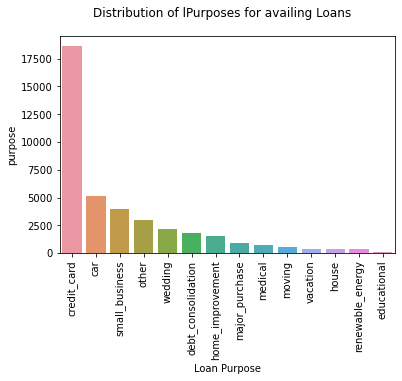

In [53]:
#Distriburion of the purpose for availing loan
purpose_labels = pd.unique(df['purpose'])
#purpose_labels = purpose_labels.astype(str)
sns.barplot(x = purpose_labels, y = df['purpose'].value_counts())
plt.suptitle('Distribution of lPurposes for availing Loans')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 90)
plt.show()
#Majority of the purpose for availing loan is for paying off credit card bills

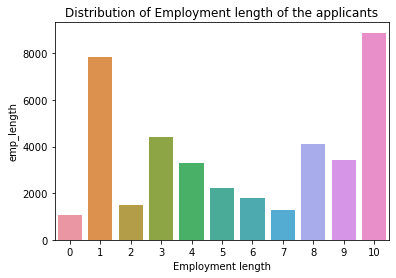

In [54]:
#Distribution of Employement Length
emp_labels = pd.unique(df.emp_length)
sns.barplot(x = emp_labels, y = df['emp_length'].value_counts())
plt.title('Distribution of Employment length of the applicants')
plt.xlabel('Employment length')
plt.show()

In [55]:
df['emp_length'].describe() #Most of the applicants have an experience of 10 years

count    39717.000000
mean         4.954226
std          3.461960
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

# Segmented Univariate Analysis

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Debit to Income Ratio')

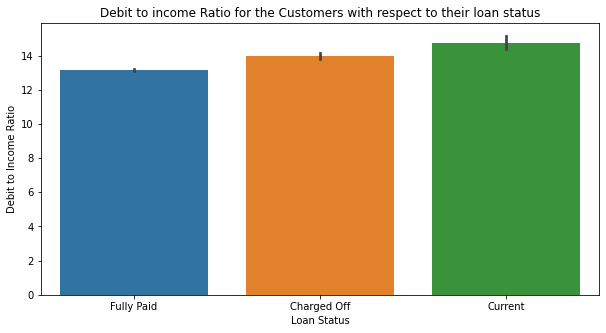

In [56]:
#Distribution of debit to income ratio of the applicants Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.dti)
plt.title('Debit to income Ratio for the Customers with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Debit to Income Ratio')
#Fully paid customers have aslightly lower dti compared to those with Charged Off status

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loan Amount')

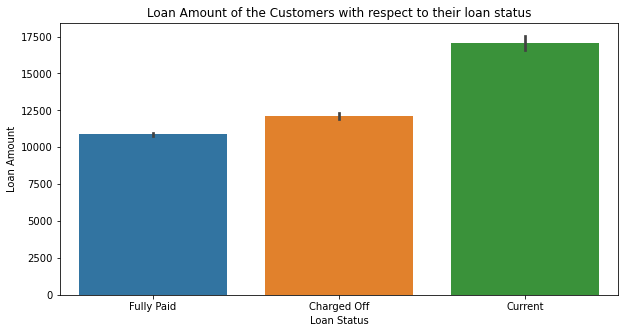

In [57]:
#Distribution of Loan Amount of the applicants Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.loan_amnt)
plt.title('Loan Amount of the Customers with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

#Fully paid customers have availed a slightly lower loan amount compared to those with Charged Off status

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Payments received to date for total amount funded')

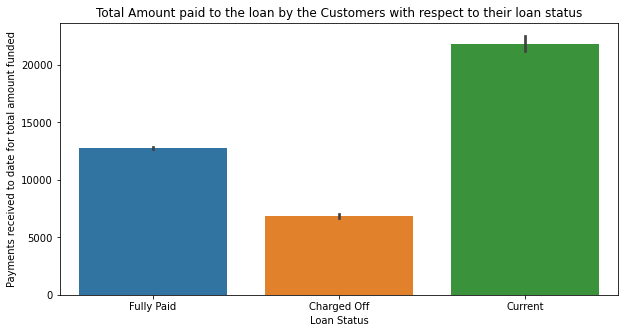

In [58]:
#Distribution of Total Payment received from the applicants Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.total_pymnt)
plt.title('Total Amount paid to the loan by the Customers with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Payments received to date for total amount funded')

#As expected fully paid and current loan customers are repayment more promptly than charged off customers

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Annual Income')

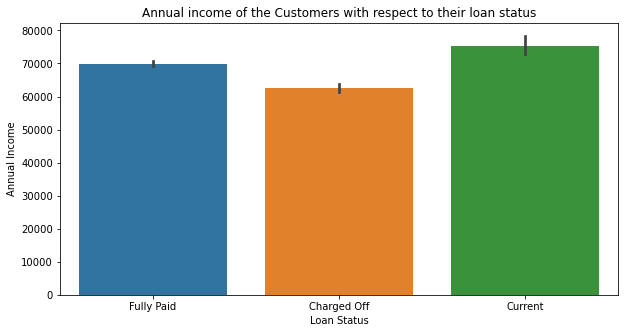

In [59]:
#Distribution of Annual Income of the applicants Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.annual_inc)
plt.title('Annual income of the Customers with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')

#Annual Income of the customers are more in Fully paid and current categories compared to that in Charged off category

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Employment length')

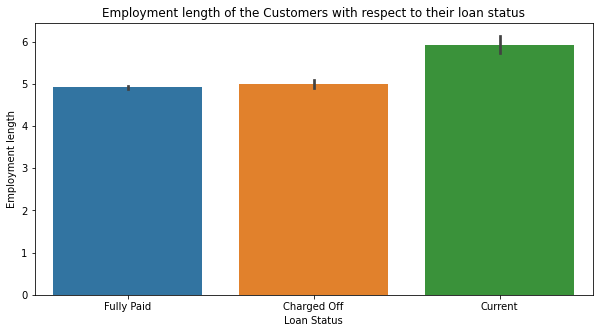

In [60]:
#Distribution of Employment Length of the applicants Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.emp_length)
plt.title('Employment length of the Customers with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Employment length')

#The employment length is almost the same in Fully paid and charged off categories

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Interest Rate')

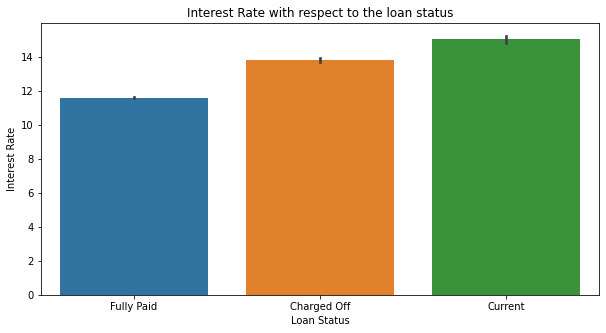

In [61]:
#Distribution of Interest Rate of the applicants Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.int_rate)
plt.title('Interest Rate with respect to the loan status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')

#The interest rate is higher for Charged off applicants than that for fully paid

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Principle amount received')

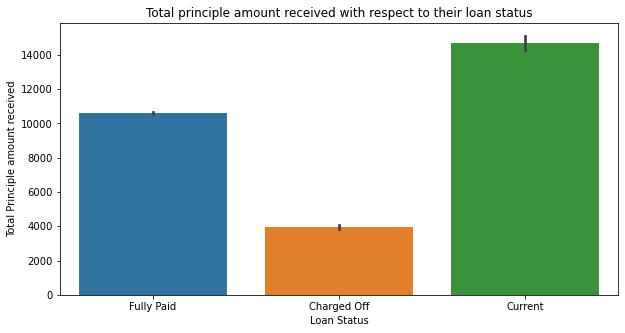

In [62]:
#Distribution of Total Principle Received Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.total_rec_prncp)
plt.title('Total principle amount received with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Total Principle amount received')

#The total principle received is lesser from Charged off customers

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Interest amount received')

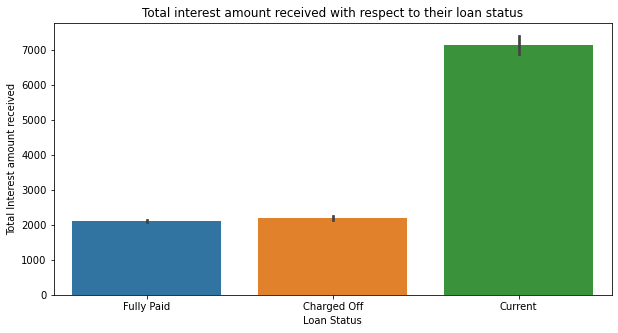

In [63]:
#Distribution of Total Interest Received Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.total_rec_int)
plt.title('Total interest amount received with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Total Interest amount received')

#The total interest received is almost same for fully paid and charged off customers

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Late Fees')

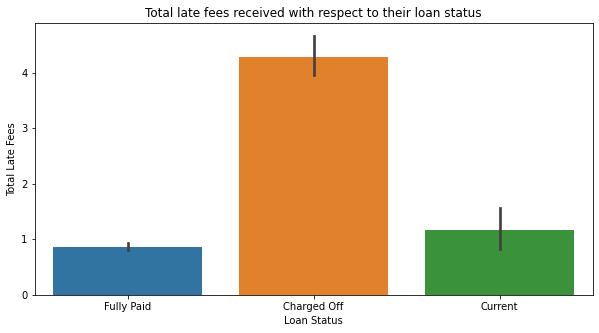

In [64]:
#Distribution of Late Fee Received Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.total_rec_late_fee)
plt.title('Total late fees received with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Total Late Fees')

#The late fees collected is higher in charged off customers

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Revolving Credit Utilization')

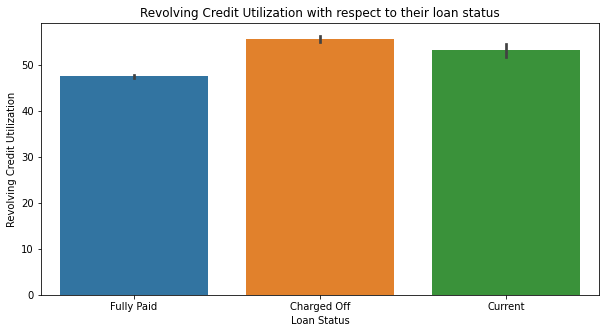

In [65]:
#Distribution of Revolving Credit Utilization Vs their loan status
plt.figure(figsize = (10,5))
sns.barplot(df.loan_status, df.revol_util)
plt.title('Revolving Credit Utilization with respect to their loan status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Credit Utilization')

#The late fees collected is higher in charged off customers

# Bivariate Analysis

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Interest Rate')

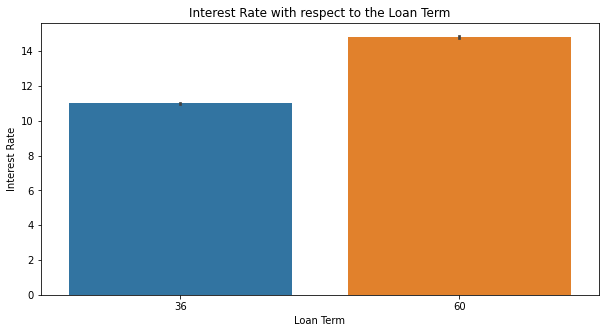

In [66]:
#Distribution of Interest Rate of the applicants Vs their loan Term
plt.figure(figsize = (10,5))
sns.barplot(df.term, df.int_rate)
plt.title('Interest Rate with respect to the Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Interest Rate')
#Interest Rate is higher for longer term of loans

Text(0, 0.5, 'Loan Amount')

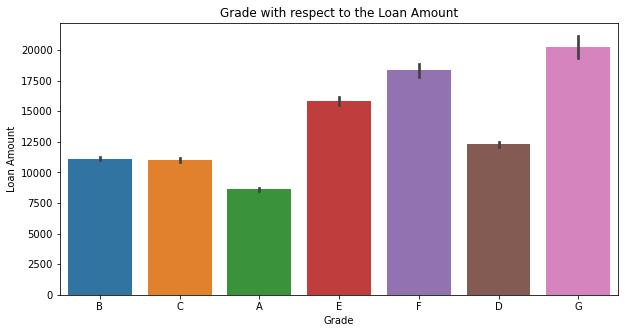

In [67]:
#Distribution of Grade with respect to Loan Amount
plt.figure(figsize = (10,5))
sns.barplot(x= df.grade, y = df.loan_amnt)
plt.title('Grade with respect to the Loan Amount')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
#People with lower grades are sanctioned higher loan amount

Text(0, 0.5, 'Loan Amount')

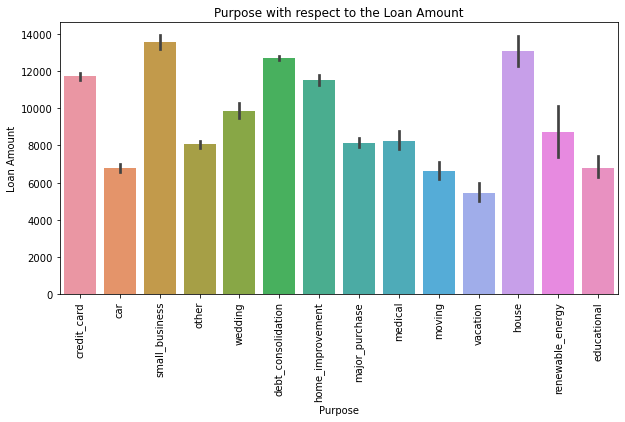

In [68]:
#Distribution of Purpose with respect to Loan Amount
plt.figure(figsize = (10,5))
sns.barplot(x= df.purpose, y = df.loan_amnt)
plt.title('Purpose with respect to the Loan Amount')
plt.xlabel('Purpose')
plt.xticks(rotation = 90)
plt.ylabel('Loan Amount')
#Higher loan amounts have been availed for small business and house.
#People avail lower loan amount for vacation and moving

Text(0, 0.5, 'Employment Length')

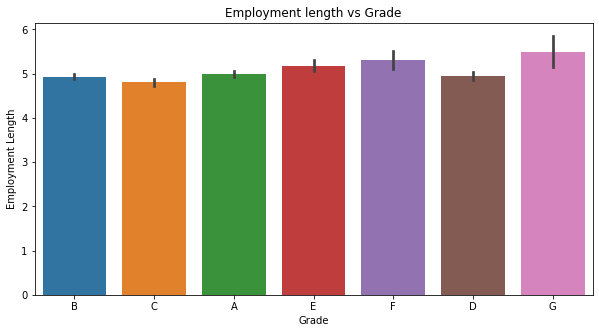

In [69]:
#Distribution of Employment length with respect to the Grade
plt.figure(figsize = (10,5))
sns.barplot(x= df.grade, y = df.emp_length)
plt.title('Employment length vs Grade')
plt.xlabel('Grade')
plt.ylabel('Employment Length')
# If Employment lengthis long, the Grades assigned can be good

Text(0, 0.5, 'Interest Rate')

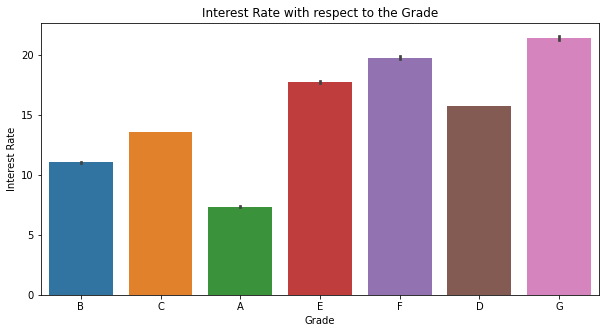

In [70]:
#Distribution of Interest Rate with respect the Grade
plt.figure(figsize = (10,5))
sns.barplot(x= df.grade , y = df.int_rate)
plt.title('Interest Rate with respect to the Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
#Higher the Grade, Lower is the interest rate

Text(0, 0.5, 'Annual Income')

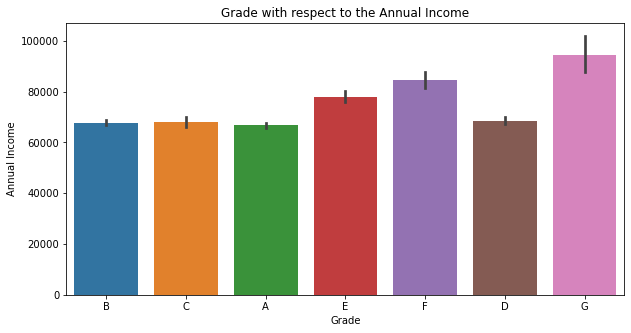

In [71]:
#Distribution of Annual Income with respect the Grade
plt.figure(figsize = (10,5))
sns.barplot(x= df.grade , y = df.annual_inc)
plt.title('Grade with respect to the Annual Income')
plt.xlabel('Grade')
plt.ylabel('Annual Income')
#Higher the Grades have almost equal annual income but lower grades have more annualiincome 

Text(0, 0.5, 'Loan Amount')

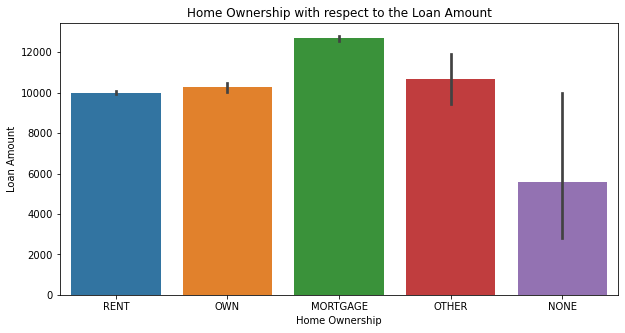

In [72]:
#Distribution of Ownership of home with respect to Loan Amount
plt.figure(figsize = (10,5))
sns.barplot(x= df.home_ownership, y = df.loan_amnt)
plt.title('Home Ownership with respect to the Loan Amount')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
#High loan amounts are availed by people who have mortgaged their homes
#Home is also the second highest amount for availing loan

Text(0, 0.5, 'Installment')

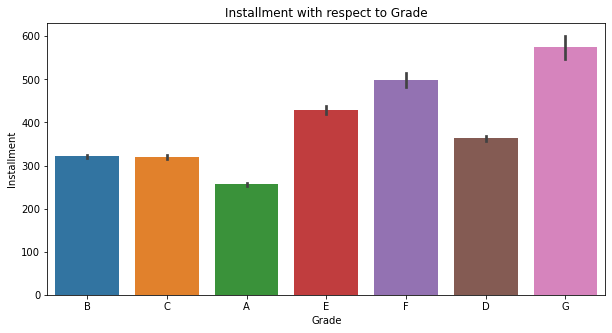

In [73]:
#Distribution of Installment with respect to Grade
plt.figure(figsize = (10,5))
sns.barplot(x= df.grade, y = df.installment)
plt.title('Installment with respect to Grade')
plt.xlabel('Grade')
plt.ylabel('Installment')
#Low Grade applicants have to pay higher installments

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Derogatory Public Record')

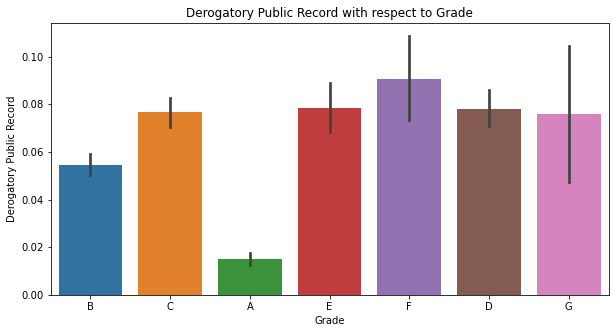

In [74]:
#Distribution of Derogatory Public Record with respect to Grade
plt.figure(figsize = (10,5))
sns.barplot(df.grade, df.pub_rec)
plt.title('Derogatory Public Record with respect to Grade')
plt.xlabel('Grade')
plt.ylabel('Derogatory Public Record')
#Only A nd B Grades have derogatory remarks below 50% of the total

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Public Record Bankruptcies')

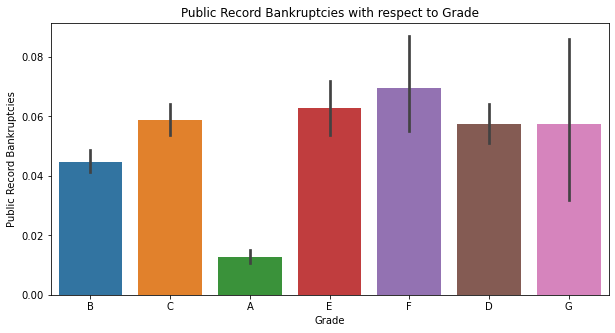

In [75]:
#Distribution of Public Record Bankruptcies with respect to Grade
plt.figure(figsize = (10,5))
sns.barplot(df.grade, df.pub_rec_bankruptcies)
plt.title('Public Record Bankruptcies with respect to Grade')
plt.xlabel('Grade')
plt.ylabel('Public Record Bankruptcies')
#Only A nd B Grades have derogatory remarks below 50% of the total

In [76]:
df.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int32
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
pub_rec                          int64
revol_util                     float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
last_pymnt_d            datetime64[ns]
last_pymnt_amnt          

In [77]:
df1 = df.corr(method ='kendall')

<AxesSubplot:>

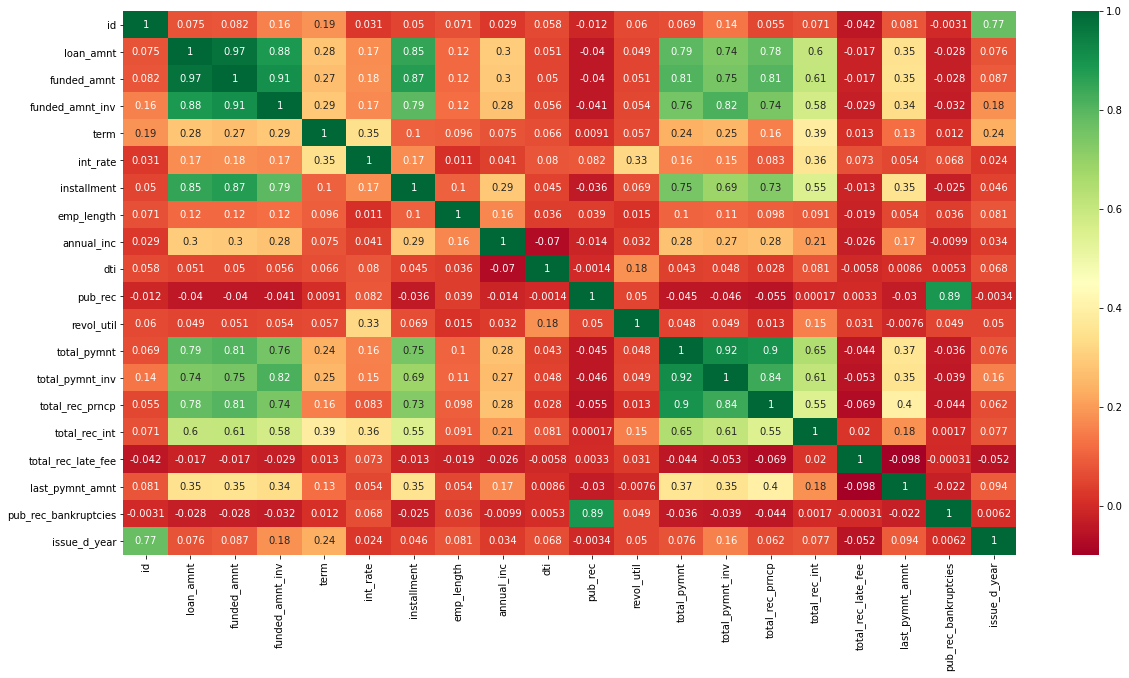

In [78]:
plt.figure(figsize = (20,10))
sns.heatmap(df1, cmap ='RdYlGn', annot = True)